In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import seaborn as sns
import pandas as pd
from astropy.time import Time
from astropy.table import Table
import lightkurve as lk
from astropy.stats import sigma_clip

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


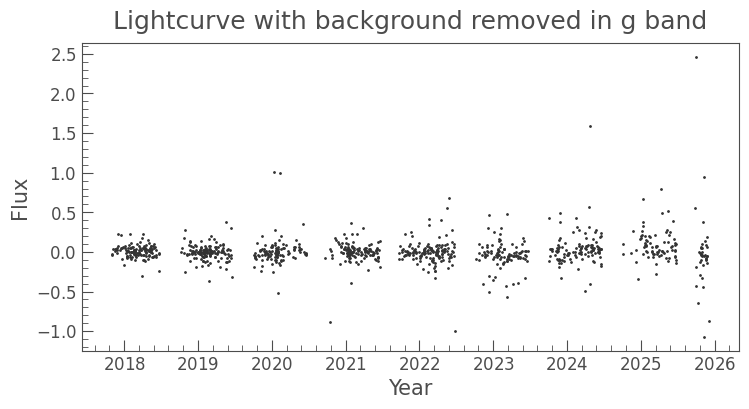

In [16]:
i2 = pd.read_csv('/Users/shaunparasher/Documents/VS Code/denison_2026_test/shaun/Data/ASASSN/asassn_diff_image_added_lightcurve.csv')
i1 = pd.read_csv('/Users/shaunparasher/Documents/VS Code/denison_2026_test/shaun/Data/ASASSN/asassn_diff_image_lightcurve.csv')
i3 = pd.read_csv('/Users/shaunparasher/Documents/VS Code/denison_2026_test/shaun/Data/ASASSN/asassn_image_lightcurve.csv')

i1_V = i1[i1['Filter'] == 'V']
i1_g = i1[i1['Filter'] == 'g']
i2_V = i2[i2['Filter'] == 'V']
i2_g = i2[i2['Filter'] == 'g']

subset = i1_g
band = 'g'

t_years = Time(subset['HJD'], format='jd').decimalyear

curve = lk.LightCurve(time=t_years, flux=subset['flux(mJy)'], flux_err=subset['flux_err'])

ax = curve.scatter(title=f"Lightcurve with background removed in {band} band")
ax.set_xlabel("Year")
plt.show()

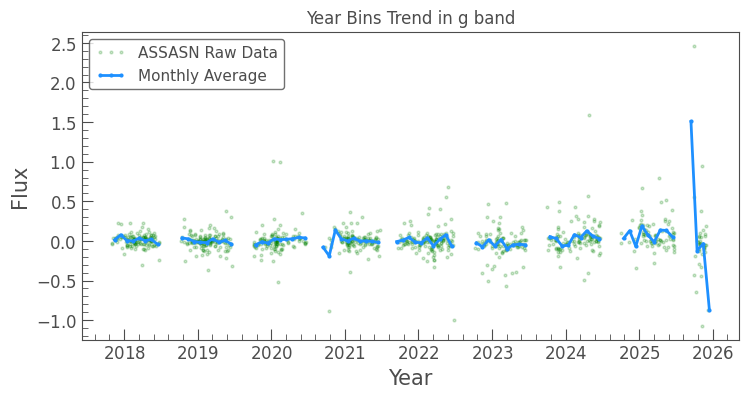

In [15]:
ax = curve.plot(alpha=0.2, color='green', label='ASSASN Raw Data', linestyle='none', marker='o')
bin_curve = curve.bin(time_bin_size=1/12) 

bin_curve.plot(ax=ax, color='dodgerblue', linewidth=2, marker='o', label='Monthly Average')

ax.set_title(f"Year Bins Trend in {band} band")
ax.set_xlabel("Year")
plt.show()

<Axes: title={'center': 'ZTF Lightcurve in R Band'}, xlabel='Time [JD]', ylabel='Flux'>

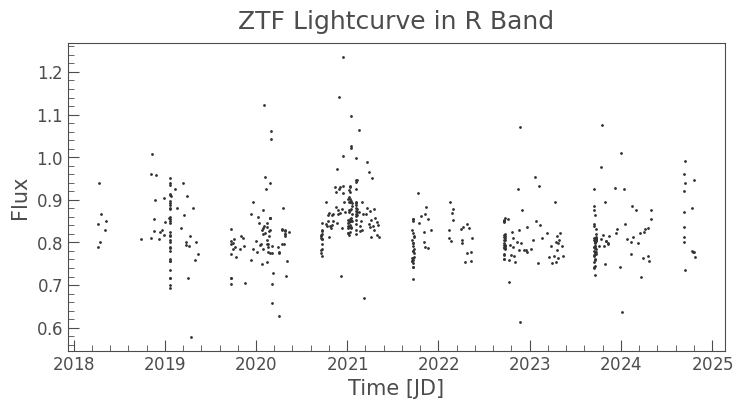

In [4]:
# ztf fluxes
ztf_file = '/Users/shaunparasher/Documents/VS Code/denison_2026_test/shaun/Data/ZTF Data/lc_samiclagn.fits'
ztf_data = fits.open(ztf_file)[1].data
mag_ztf = ztf_data['mag']
mag_err_ztf = ztf_data['magerr']
hjd_ztf = ztf_data['hjd']

flux = 3631 * 10**(-0.4 * mag_ztf) * 1000
flux_err = flux * 0.921 * mag_err_ztf

t = Table.read(ztf_file)

time_ztf = Time(hjd_ztf, format='jd')
time_ztf = time_ztf.decimalyear

zt_years = Time(hjd_ztf, format='jd').decimalyear
curve = lk.LightCurve(time=zt_years, flux=flux, flux_err=flux_err)
curve.scatter(title="ZTF Lightcurve in R Band")

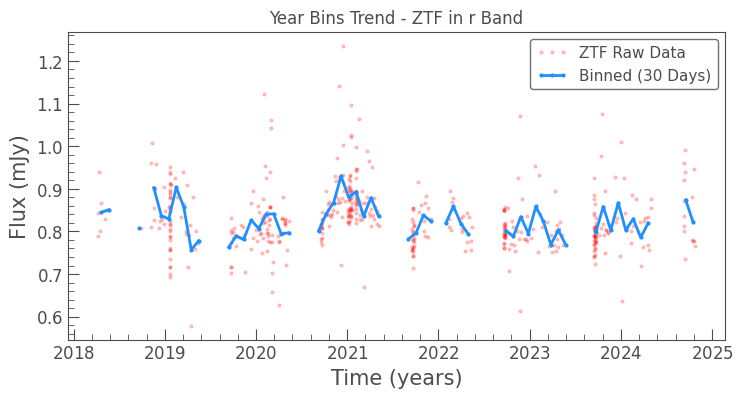

In [5]:
days = 30
bin_size = days / 365.25
binned_curve = curve.bin(time_bin_size=bin_size)
ax = curve.plot(alpha=0.2, label='ZTF Raw Data', color='red', marker='o', linestyle='none')
binned_curve.plot(ax=ax, color='dodgerblue', linewidth=2, marker='o', label=f'Binned ({days} Days)')
ax.set_title("Year Bins Trend - ZTF in r Band")
ax.set_ylabel("Flux (mJy)")
ax.set_xlabel("Time (years)")
plt.show()

In [6]:
# atlas mags
#index of band is 5


filepath = '/Users/shaunparasher/Documents/VS Code/denison_2026_test/shaun/Data/ATLAS data/job3635727.txt'

catt = []
with open(filepath, 'r') as atlas:

    for i in atlas:
        catt.append(i.split())
    
    cat = np.array(catt)

    o_cat = np.array([])

    mask = (cat[:, 5] == 'o')
    o_cat = cat[mask]

mjd = o_cat[:, 0].astype(float)
flux = o_cat[:, 3].astype(float) / 1000
flux_err = o_cat[:, 4].astype(float) / 1000

sigma = 3

flux_clipped = sigma_clip(flux, sigma=sigma, maxiters=5)
n_mask = ~flux_clipped.mask
mjd_clean = mjd[n_mask]
flux_clean = flux[n_mask]
flux_err_clean = flux_err[n_mask]


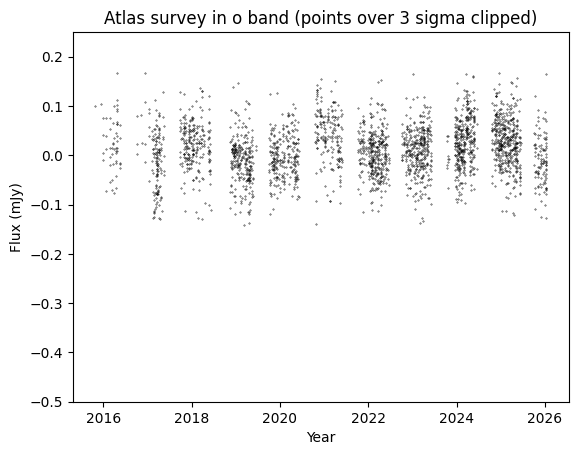

In [7]:
at_years = Time(mjd_clean, format='mjd').decimalyear
plt.ylim(-0.5, 0.25)
plt.scatter(at_years, flux_clean, color='black', s=0.1)
plt.xlabel('Year')
plt.ylabel('Flux (mJy)')
plt.title(f"Atlas survey in o band (points over {sigma} sigma clipped)")
plt.show()

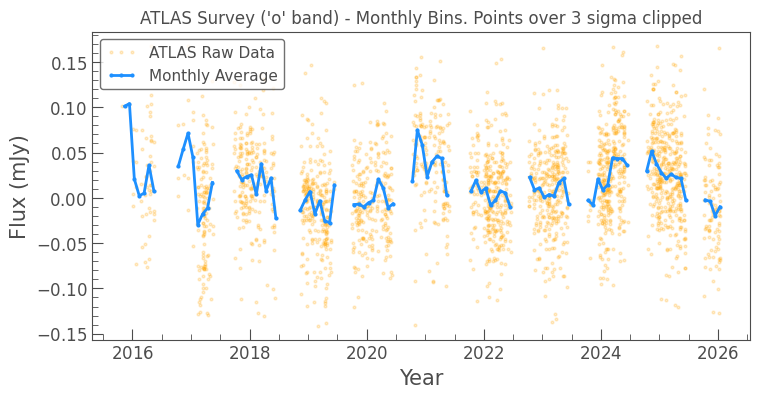

In [8]:
atlas_lc = lk.LightCurve(time=at_years, flux=flux_clean, flux_err=flux_err_clean)
ax = atlas_lc.plot(alpha=0.2, color='orange',marker='o', linestyle='none', label='ATLAS Raw Data')
atlas_binned = atlas_lc.bin(time_bin_size=1/12)
atlas_binned.plot(ax=ax, color='dodgerblue', linewidth=2, marker='o', label='Monthly Average')


ax.set_title(f"ATLAS Survey ('o' band) - Monthly Bins. Points over {sigma} sigma clipped")
ax.set_ylabel("Flux (mJy)")
ax.set_xlabel("Year")
plt.show()



In [9]:
start_search = 2020.0
end_search = 2022.0

window_mask = (at_years >= start_search) & (at_years <= end_search)

window_mjd = mjd_clean[window_mask]
window_flux = flux_clean[window_mask]

peak_index = np.argmax(window_flux)

spike_mjd = window_mjd[peak_index]
spike_flux = window_flux[peak_index]

print(f"peak MJD {spike_mjd:.4f}")
print(f"peak Flux {spike_flux:.2f} MJy")

peak MJD 59190.5321
peak Flux 0.15 MJy


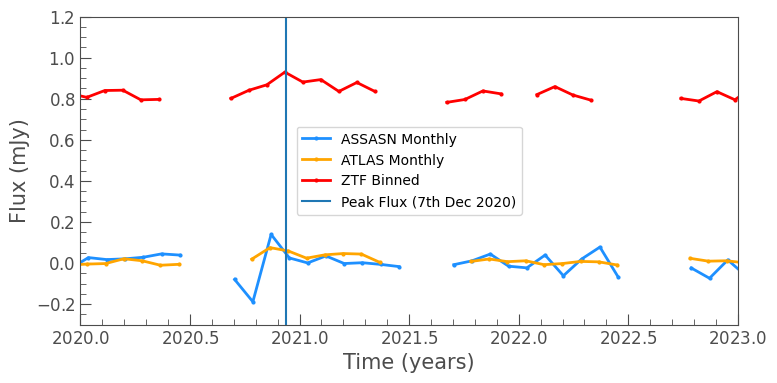

In [11]:
t_years = Time(subset['HJD'], format='jd').decimalyear
assassn_curve = lk.LightCurve(time=t_years, flux=subset['flux(mJy)'], flux_err=subset['flux_err'])

ax = assassn_curve.plot(title=f"Combined Lightcurve", alpha=0, color='green', label='_nolegend_')

bin_curve = assassn_curve.bin(time_bin_size=1/12)
bin_curve.plot(ax=ax, color='dodgerblue', linewidth=2, marker='o', label='ASSASN Monthly')

atlas_lc = lk.LightCurve(time=at_years, flux=flux_clean, flux_err=flux_err_clean)

atlas_lc.plot(ax=ax, alpha=0, color='orange', marker='o', linestyle='none') 
atlas_binned = atlas_lc.bin(time_bin_size=1/12)
atlas_binned.plot(ax=ax, color='orange', linewidth=2, marker='o', label='ATLAS Monthly')

days = 30
bin_size = days / 365.25
binned_curve = curve.bin(time_bin_size=bin_size)

curve.plot(ax=ax, alpha=0, color='red', marker='o', linestyle='none') 
binned_curve.plot(ax=ax, color='red', linewidth=2, marker='o', label=f'ZTF Binned')

plt.ylim(-0.3, 1.2)

59190.5321


plt.axvline(x=2020 + (11)/12 + (7/30)/12, label='Peak Flux (7th Dec 2020)')
plt.xlim(2020, 2023)

plt.xlabel('Time (years)')
plt.ylabel('Flux (mJy)')
plt.legend()
plt.show()